<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Microsoft_Stock_Forecasting_using_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import datetime
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

In [ ]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days = 13000)
start, end

(datetime.datetime(1989, 4, 14, 7, 27, 35, 743520),
 datetime.datetime(2024, 11, 16, 7, 27, 35, 743520))

In [ ]:
stock = ['MSFT']

In [ ]:
df = yf.download(stock, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
1989-04-14 00:00:00+00:00,0.217307,0.352431,0.355903,0.342014,0.342014,62625600
1989-04-17 00:00:00+00:00,0.220518,0.357639,0.363715,0.352431,0.355903,51638400
1989-04-18 00:00:00+00:00,0.228011,0.369792,0.369792,0.361111,0.364583,69336000
1989-04-19 00:00:00+00:00,0.234969,0.381076,0.387153,0.378472,0.381944,168969600
1989-04-20 00:00:00+00:00,0.239787,0.388889,0.392361,0.378472,0.381944,138801600


In [ ]:
df = df.reset_index()
df = df[['Date', 'Close']]
df

Price,Date,Close
Ticker,,MSFT
0,1989-04-14 00:00:00+00:00,0.352431
1,1989-04-17 00:00:00+00:00,0.357639
2,1989-04-18 00:00:00+00:00,0.369792
3,1989-04-19 00:00:00+00:00,0.381076
4,1989-04-20 00:00:00+00:00,0.388889
...,...,...
8963,2024-11-11 00:00:00+00:00,418.010010
8964,2024-11-12 00:00:00+00:00,423.029999
8965,2024-11-13 00:00:00+00:00,425.200012


In [ ]:
# code not needed because data is not in csv
# def str_to_datetime(s):
#   split = s.split('-')
#   year, month, day = int(split[0]), int(split[1]), int(split[2])
#   return datetime.datetime(year = year, month = month, day = day)
# datetime_object = str_to_datetime('1986-03-19')
# datetime

In [ ]:
#df['Date'] = df['Date'].apply(str_to_datetime)

In [ ]:
df['Date']

,Date
0,1989-04-14 00:00:00+00:00
1,1989-04-17 00:00:00+00:00
2,1989-04-18 00:00:00+00:00
3,1989-04-19 00:00:00+00:00
4,1989-04-20 00:00:00+00:00
...,...
8963,2024-11-11 00:00:00+00:00
8964,2024-11-12 00:00:00+00:00
8965,2024-11-13 00:00:00+00:00
8966,2024-11-14 00:00:00+00:00


In [ ]:
df.index = df.pop('Date')
df

Price,Close
Ticker,MSFT
Date,
1989-04-14 00:00:00+00:00,0.352431
1989-04-17 00:00:00+00:00,0.357639
1989-04-18 00:00:00+00:00,0.369792
1989-04-19 00:00:00+00:00,0.381076
1989-04-20 00:00:00+00:00,0.388889
...,...
2024-11-11 00:00:00+00:00,418.010010
2024-11-12 00:00:00+00:00,423.029999


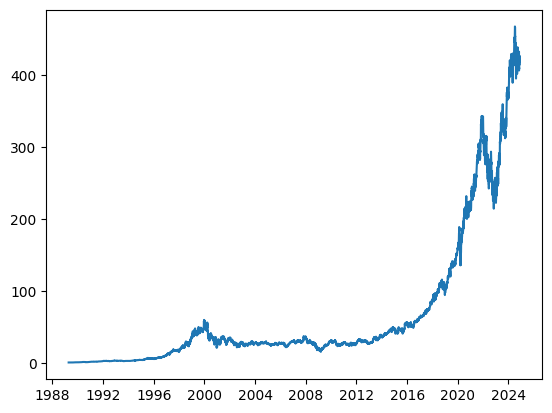

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [ ]:
import pandas as pd
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):

    # Convert date strings to datetime objects
    dataframe.index = dataframe.index.tz_localize(None)

    first_date = pd.to_datetime(first_date_str).tz_localize(None)
    last_date = pd.to_datetime(last_date_str).tz_localize(None)

    target_date = first_date

    dates = []
    X, Y = [], []
    last_time = False

    while True:
        # Subset the dataframe up to the target date and get the last (n+1) rows
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        # Ensure we have enough data for the window
        if len(df_subset) != n + 1:
            print(f"Error: Window size of {n} is too large for date {target_date}")
            return

        # Extract input (X) and target (y) values
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)

        # Get the next target date (1 week ahead)
        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            break

        # Extract the next date from the dataframe
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date = pd.to_datetime(next_datetime_str.split('T')[0])

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    # Create the output dataframe
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    # Add windowed input features
    X = np.array(X)
    for i in range(0, n):
        ret_df[f'Target-{n-i}'] = X[:, i]

    # Add the target value
    ret_df['Target'] = Y

    return ret_df

# Example usage (replace with your actual dataframe)
# Assuming df has a datetime index and a 'Close' column
windowed_df = df_to_windowed_df(df, '2021-03-25', '2022-03-23', n=3)
print(windowed_df)

    Target Date    Target-3    Target-2    Target-1                Target
0    2021-03-25  235.990005  237.580002  235.460007  [232.33999633789062]
1    2021-03-26  237.580002  235.460007  232.339996  [236.47999572753906]
2    2021-03-29  235.460007  232.339996  236.479996  [235.24000549316406]
3    2021-03-30  232.339996  236.479996  235.240005  [231.85000610351562]
4    2021-03-31  236.479996  235.240005  231.850006  [235.77000427246094]
..          ...         ...         ...         ...                   ...
247  2022-03-17  276.440002  287.149994  294.390015   [295.2200012207031]
248  2022-03-18  287.149994  294.390015  295.220001  [300.42999267578125]
249  2022-03-21  294.390015  295.220001  300.429993   [299.1600036621094]
250  2022-03-22  295.220001  300.429993  299.160004  [304.05999755859375]
251  2022-03-23  300.429993  299.160004  304.059998    [299.489990234375]

[252 rows x 5 columns]


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:,0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1] , 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


<ipython-input-13-539e787bd1fb>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return dates, X.astype(np.float32), Y.astype(np.float32)


((252,), (252, 3, 1), (252,))

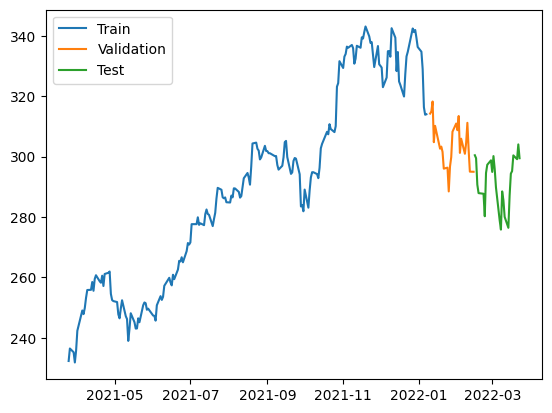

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])

model.compile(loss = 'mse',
              optimizer = Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=300)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 84222.1797 - mean_absolute_error: 288.2706 - val_loss: 91503.3672 - val_mean_absolute_error: 302.4077
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 83081.3125 - mean_absolute_error: 286.4710 - val_loss: 90833.1875 - val_mean_absolute_error: 301.2975
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 82691.8047 - mean_absolute_error: 285.8592 - val_loss: 90054.2812 - val_mean_absolute_error: 300.0022
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 81271.0703 - mean_absolute_error: 283.3698 - val_loss: 89234.6172 - val_mean_absolute_error: 298.6329
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 81400.1797 - mean_absolute_error: 283.6709 - val_loss: 88113.3672 - val_mean_absolute_error: 296.7496
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 80494.6953 - mean_absolute_error: 281.8827 - val_loss: 86443.3281 - val_mean_absolute_error: 293.9224
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


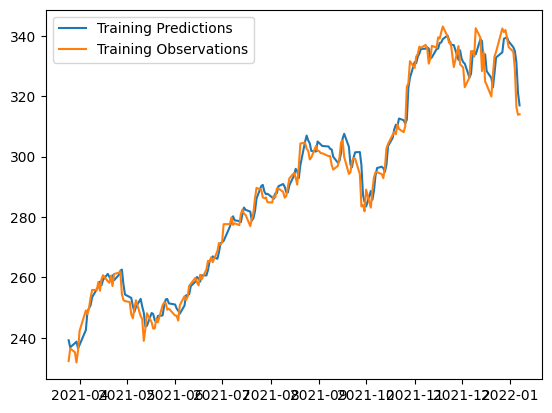

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


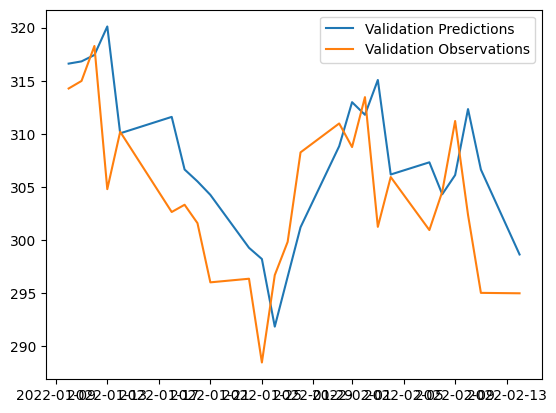

In [21]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


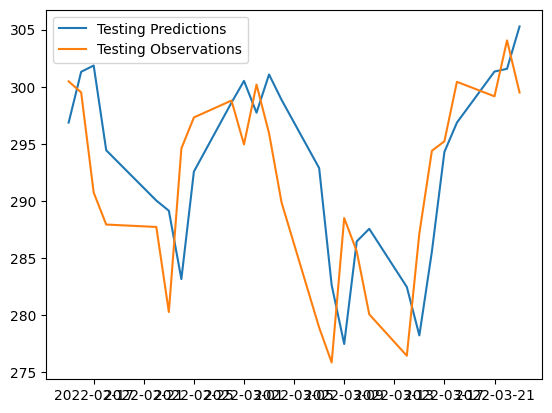

In [23]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

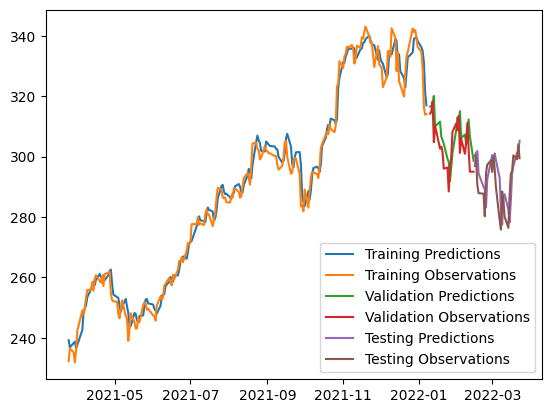

In [24]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [25]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

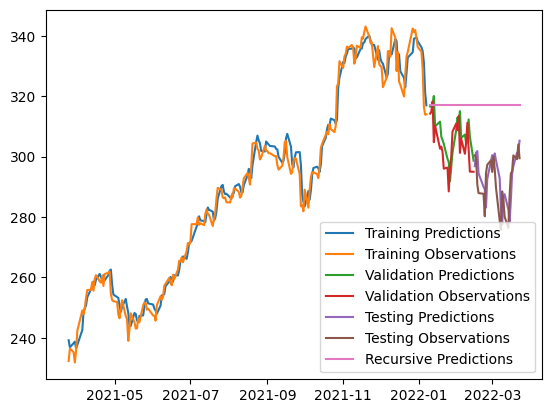

In [26]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])